In [1]:
# show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import required libraries
# pandas:Data framework library for Python
import os
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
from scipy import stats
from scipy.misc.pilutil import imread

In [3]:
death = pd.read_csv("death_solo_er.csv")

In [45]:
#Remove death with glitches
death = death.loc[(death['killer_position_x'] != 0) & (death['victim_position_x'] != 0)].copy()
death = death.loc[(death['kill_distance'] < 400000)].copy()

x_diffs = death['killer_position_x'] - death['victim_position_x']
y_diffs = death['killer_position_y'] - death['victim_position_y']
sq_diffs = x_diffs ** 2 + y_diffs ** 2
dists = np.sqrt(sq_diffs)
log_dists = np.log10(1 + dists)

In [46]:
death['kill_distance'] = dists.apply(lambda x: x)

In [47]:
death.head()

killed_by killer_name  killer_placement  killer_position_x  \
0       P92      Adlerx              51.0           391919.3   
1       AKM  CocaCola01               4.0           347226.7   
2      P18C    jprodigy              85.0           421634.0   
4      UMP9     MLBBear              30.0           420148.7   
5      S686   JackieCOC               5.0           350512.6   

   killer_position_y      map  \
0           235406.2  ERANGEL   
1           142356.4  ERANGEL   
2           324678.9  ERANGEL   
4           324679.9  ERANGEL   
5           403584.0  ERANGEL   

                                            match_id  time   victim_name  \
0  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...   425      Sventy21   
1  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...  1477  PNW_Franco17   
2  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...   126         Eagyl   
4  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...   263       Hastela   
5  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...   187         Satch   

   victim_placement  victim_position_x  victim_position_y  kill_distance  
0              59.0           392289.6           235706.1     476.510336  
1               9.0           345692.8           141435.4    1789.159079  
2              86.0           421077.3           324661.9     556.959505  
4              71.0           420297.3           326671.7    1997.335525  
5              79.0           350609.2           403244.2     353.264207

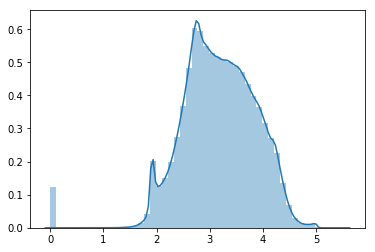

In [48]:
sns.distplot(log_dists.dropna());

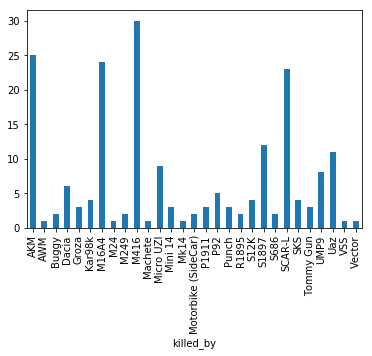

In [49]:
death.loc[log_dists > 5, :].groupby('killed_by').size().plot.bar();

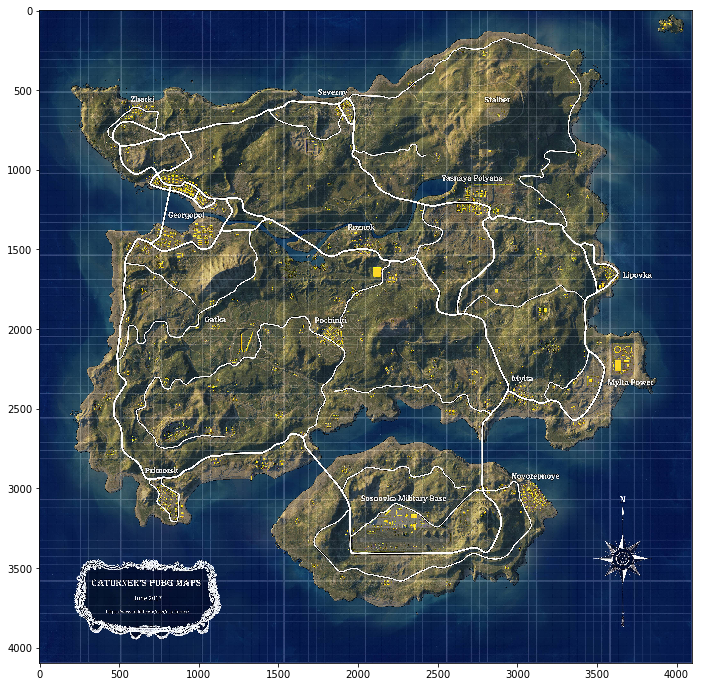

In [18]:
#np.max(np.log10(1 + dists))
#death_ng.loc[dists > 3000, :].groupby('killed_by').size().plot.bar();
bg = imread("erangel.jpg")
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(bg);

In [19]:
def kill_viz(killer_pos, victim_pos, bg, bg_width, bg_height, zoom=False, figsize=(15, 15)):
    fig, ax = plt.subplots(figsize=figsize)
    x, y = killer_pos
    tx, ty = victim_pos
    dx, dy = tx - x, ty - y
    x *= bg_width / 800000
    y *= bg_height / 800000
    dx *= bg_width / 800000
    dy *= bg_height / 800000
    ax.imshow(bg)
    arrow_width = min((abs(dx) + abs(dy)), (bg_width + bg_height) * 0.2) * 0.02
    if zoom:
        edge = max(abs(dx), abs(dy))
        ax.set_xlim(max(0, min(x, x + dx) - edge * 5), min(max(x, x + dx) + edge * 5, bg_width))
        ax.set_ylim(min(max(y, y + dy) + edge * 5, bg_width), max(min(y, y + dy) - edge * 5, 0))
    ax.arrow(x, y, dx, dy, width=arrow_width, color='r', length_includes_head=True)
    plt.show()

In [20]:
temp = death.loc[(dists == np.max(dists))].iloc[0]
kp = (temp['killer_position_x'], temp['killer_position_y'])
vp = (temp['victim_position_x'], temp['victim_position_y'])
print(temp)

killed_by                                                        Punch
killer_name                                               liangxiansen
killer_placement                                                    50
killer_position_x                                               795422
killer_position_y                                              18904.3
map                                                            ERANGEL
match_id             2U4GBNA0YmldBuoTne5sVB3oxE3AWA4-arCenqGrsEoM6s...
time                                                               453
victim_name                                                  Fallengle
victim_placement                                                    61
victim_position_x                                              69320.4
victim_position_y                                               497318
Name: 2396320, dtype: object


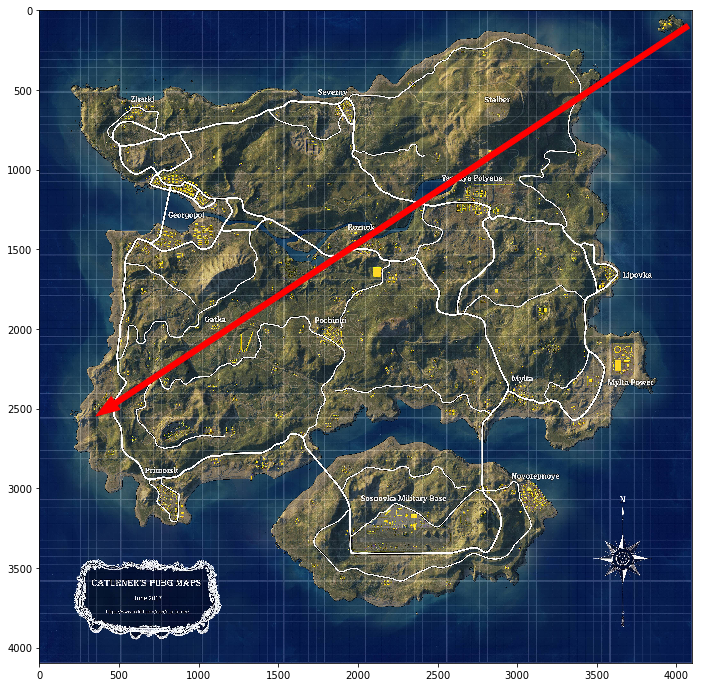

In [21]:
kill_viz(kp, vp, bg, 4096, 4096, zoom=True, figsize=(12, 12))

In [29]:
test1 = death.loc[(death['kill_distance'] < 200000) | (death['killed_by'] != 'Punch')].copy()

In [50]:
test2 = death.query('kill_distance < 200000 | killed_by != "Punch"')

In [51]:
temp = test2.loc[test2['kill_distance'].idxmax()]
kp = (temp['killer_position_x'], temp['killer_position_y'])
vp = (temp['victim_position_x'], temp['victim_position_y'])
print(temp)

killed_by                                                        S1897
killer_name                                               panzhixin123
killer_placement                                                    43
killer_position_x                                               794989
killer_position_y                                              20172.4
map                                                            ERANGEL
match_id             2U4GBNA0YmlGU3kJKeUwrYsN_mET--sTLhLBPwvnNBxoWp...
time                                                               390
victim_name                                                   masago17
victim_placement                                                    50
victim_position_x                                               557302
victim_position_y                                               241630
kill_distance                                                   324867
Name: 6282428, dtype: object


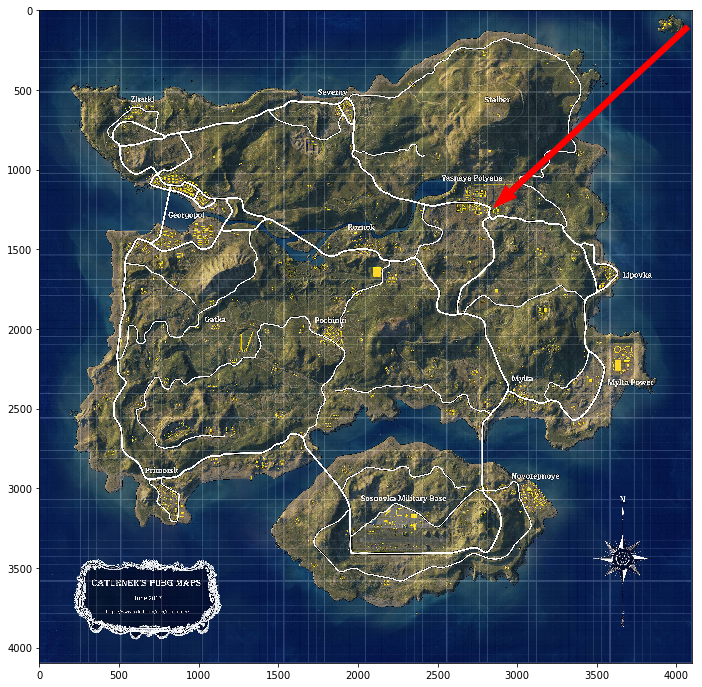

In [53]:
kill_viz(kp, vp, bg, 4096, 4096, zoom=True, figsize=(12, 12))

In [33]:
test3 = test2.loc[death['killed_by'] == 'Punch']

In [37]:
temp = test3.loc[test3['kill_distance'].idxmax()]
kp = (temp['killer_position_x'], temp['killer_position_y'])
vp = (temp['victim_position_x'], temp['victim_position_y'])
print(temp)

killed_by                                                        Punch
killer_name                                                 JizzWaffle
killer_placement                                                    52
killer_position_x                                               600786
killer_position_y                                               603878
map                                                            ERANGEL
match_id             2U4GBNA0Ymnf_aQxwmLz8dnFudfQ_eQhkfgA_edQJ-zssH...
time                                                                86
victim_name                                                pandaTV-one
victim_placement                                                    96
victim_position_x                                               523879
victim_position_y                                               673677
kill_distance                                                   103859
Name: 3913941, dtype: object


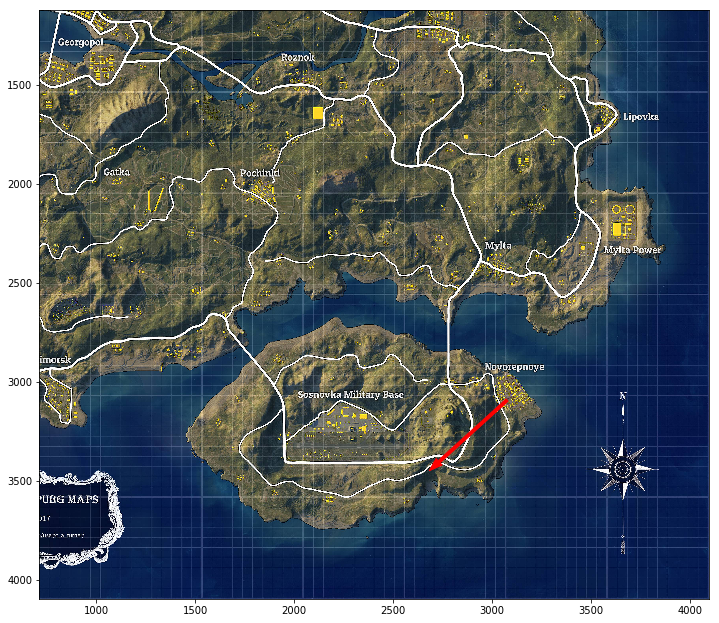

In [38]:
kill_viz(kp, vp, bg, 4096, 4096, zoom=True, figsize=(12, 12))

In [54]:
#death = death.loc[(death['killer_position_x'] != 0) & (death['victim_position_x'] != 0)].copy()

x_diffs_t = test2['killer_position_x'] - test2['victim_position_x']
y_diffs_t = test2['killer_position_y'] - test2['victim_position_y']
sq_diffs_t = x_diffs_t ** 2 + y_diffs_t ** 2
dists_t = np.sqrt(sq_diffs_t)
log_dists_t = np.log10(1 + dists_t)

In [63]:
data=test2.loc[test2['kill_distance'] < 100000]

In [64]:
data.kill_distance

0             476.510336
1            1789.159079
2             556.959505
4            1997.335525
5             353.264207
7            2129.450739
8            5126.637270
9             154.987096
10            480.598460
11            391.063486
12            954.920463
14           7974.500663
15           6660.096173
16           1448.862909
17           4128.883483
18           1496.624218
19            449.499733
20           1380.734069
21            212.509882
22           3102.135111
24            432.047243
25            337.179181
26            432.088440
27           2136.080958
28           1720.919734
30            700.800178
31           1755.578560
33            503.341335
34              0.000000
35           1863.379202
                ...     
11552923     6764.412295
11552924       80.611290
11552925      392.905396
11552926     2147.093163
11552928     4795.941998
11552929      930.496147
11552930      535.276994
11552931     4193.581097
11552932      372.298496


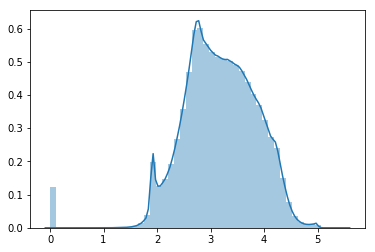

In [67]:
sns.distplot((log_dists_t).dropna());

In [69]:
test2.head()

killed_by killer_name  killer_placement  killer_position_x  \
0       P92      Adlerx              51.0           391919.3   
1       AKM  CocaCola01               4.0           347226.7   
2      P18C    jprodigy              85.0           421634.0   
4      UMP9     MLBBear              30.0           420148.7   
5      S686   JackieCOC               5.0           350512.6   

   killer_position_y      map  \
0           235406.2  ERANGEL   
1           142356.4  ERANGEL   
2           324678.9  ERANGEL   
4           324679.9  ERANGEL   
5           403584.0  ERANGEL   

                                            match_id  time   victim_name  \
0  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...   425      Sventy21   
1  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...  1477  PNW_Franco17   
2  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...   126         Eagyl   
4  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...   263       Hastela   
5  2U4GBNA0YmlixJ6lhgS6xB2tqdo7SEhoYyHlVu18akkAzL...   187         Satch   

   victim_placement  victim_position_x  victim_position_y  kill_distance  
0              59.0           392289.6           235706.1     476.510336  
1               9.0           345692.8           141435.4    1789.159079  
2              86.0           421077.3           324661.9     556.959505  
4              71.0           420297.3           326671.7    1997.335525  
5              79.0           350609.2           403244.2     353.264207

In [68]:
test2.to_csv('death_clean.csv', encoding='utf-8', index=False)